In [12]:
import logging
import math
import random
import numpy as np
import time
import torch as t
import torch.nn as nn
from torch import optim
from torch.nn import utils
import matplotlib.pyplot as plt

logger = logging.getLogger(__name__)

In [4]:
FRAME_TIME = 0.1  # second, time interval
GRAVITY_ACCEL = 10.0  # m/s2, graviational force, g
BOOST_ACCEL = 15.0  # m/s2, thrust constant

In [5]:
class Dynamics(nn.Module):
    def __init__(self):
        super(Dynamics, self).__init__()
    @staticmethod
    def forward(state, action):
        """
        action:
        action[0]: y directional boost       
        states:
        state[0] = y
        state[1] = vy  
        """   
        delta_state_gravity = t.tensor([0., GRAVITY_ACCEL * FRAME_TIME])
        thrust = action[0]
        delta_state_y = BOOST_ACCEL * FRAME_TIME * t.tensor([0., -1.0]) * thrust
        state = state + delta_state_y + delta_state_gravity
        step_mat = t.tensor([[1., FRAME_TIME], [0., 1.]])      
        state = t.matmul(step_mat, state)
        return state

In [6]:
class Dynamics(nn.Module):

    def __init__(self):
        super(Dynamics, self).__init__()

    @staticmethod
    def forward(state, action):

        """
        action: thrust or no thrust
        state[0] = y
        state[1] = y_dot
        """

        state[1] = state[1] + GRAVITY_ACCEL * FRAME_TIME - BOOST_ACCEL * FRAME_TIME * action
        
        
        step_mat = t.tensor([[1., FRAME_TIME],
                            [0., 1.]])
        state = t.matmul(step_mat, state)

        return state

In [ ]:
class Controller(nn.Module):
    def __init__(self, dim_input, dim_hidden, dim_output):
        """
        dim_input: # of system states
        dim_output: # of actions
        dim_hidden: up to you
        """
        super(Controller, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(dim_input, dim_hidden),
            nn.Tanh(),
            nn.Linear(dim_hidden, dim_hidden),
            nn.Sigmoid()
        )
    def forward(self, state):
        action = self.network(state)
        return action

In [7]:
class Simulation(nn.Module):
    def __init__(self, controller, dynamics, T):
        super(Simulation, self).__init__()
        self.state = self.initialize_state()
        self.controller = controller
        self.dynamics = dynamics
        self.T = T
        self.action_trajectory = []
        self.state_trajectory = []
    def forward(self, state):
        self.action_trajectory = []
        self.state_trajectory = []
        for _ in range(T):
            action = self.controller.forward(state)
            state = self.dynamics.forward(state, action)
            self.action_trajectory.append(action)
            self.state_trajectory.append(state)
        return self.error(state)
    @staticmethod
    def initialize_state():
        state = [1., 0.]  
        return t.tensor(state, requires_grad=False).float()
    def error(self, state):
        return state[0]**2 + state[1]**2 

In [10]:
class Optimize:
    def __init__(self, simulation):
        self.simulation = simulation
        self.parameters = simulation.controller.parameters()
        self.optimizer = optim.LBFGS(self.parameters, lr=0.008)
    def step(self):
        def closure():
            loss = self.simulation(self.simulation.state)
            self.optimizer.zero_grad()
            loss.backward()
            return loss
        self.optimizer.step(closure)
        return closure()
    def train(self, epochs):
        for epoch in range(epochs):
            loss = self.step()
            print('[%d] loss: %.3f' % (epoch + 1, loss))
            if epoch % 10 == 0:
                self.visualize()
    def visualize(self):
        data = np.array([self.simulation.state_trajectory[i].detach().numpy() for i in range(self.simulation.T)])
        v = data[:, 0]
        y = data[:, 1]
        plt.plot(v, y)
    
        plt.show()

[1] loss: 0.007


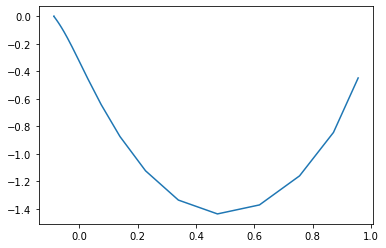

[2] loss: 0.007
[3] loss: 0.007
[4] loss: 0.007
[5] loss: 0.007
[6] loss: 0.007
[7] loss: 0.007
[8] loss: 0.007
[9] loss: 0.007
[10] loss: 0.007
[11] loss: 0.007


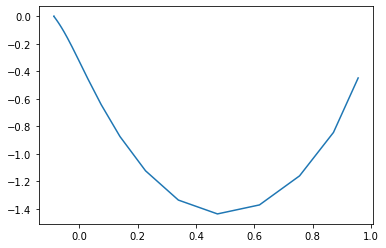

[12] loss: 0.007
[13] loss: 0.007
[14] loss: 0.007
[15] loss: 0.007
[16] loss: 0.007
[17] loss: 0.007
[18] loss: 0.007
[19] loss: 0.007
[20] loss: 0.007
[21] loss: 0.007


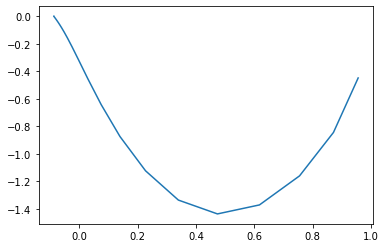

[22] loss: 0.007
[23] loss: 0.007
[24] loss: 0.007
[25] loss: 0.007
[26] loss: 0.007
[27] loss: 0.007
[28] loss: 0.007
[29] loss: 0.007
[30] loss: 0.007
[31] loss: 0.007


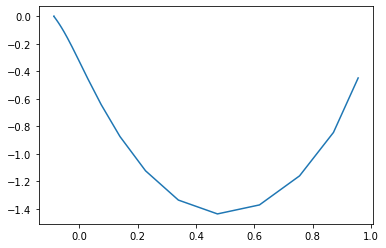

[32] loss: 0.007
[33] loss: 0.007
[34] loss: 0.007
[35] loss: 0.007
[36] loss: 0.007
[37] loss: 0.007
[38] loss: 0.007
[39] loss: 0.007
[40] loss: 0.007
[41] loss: 0.007


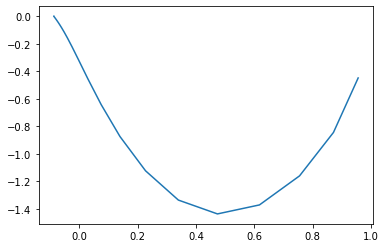

[42] loss: 0.007
[43] loss: 0.007
[44] loss: 0.007
[45] loss: 0.007
[46] loss: 0.007
[47] loss: 0.007
[48] loss: 0.007
[49] loss: 0.007
[50] loss: 0.007
[51] loss: 0.007


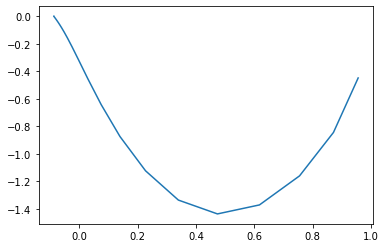

[52] loss: 0.007
[53] loss: 0.007
[54] loss: 0.007
[55] loss: 0.007
[56] loss: 0.007
[57] loss: 0.007
[58] loss: 0.007
[59] loss: 0.007
[60] loss: 0.007
[61] loss: 0.007


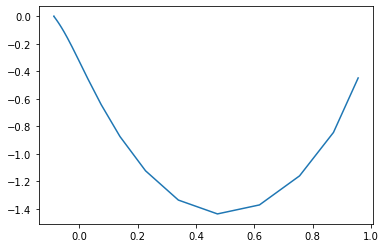

[62] loss: 0.007
[63] loss: 0.007
[64] loss: 0.007
[65] loss: 0.007
[66] loss: 0.007
[67] loss: 0.007
[68] loss: 0.007
[69] loss: 0.007
[70] loss: 0.007
[71] loss: 0.007


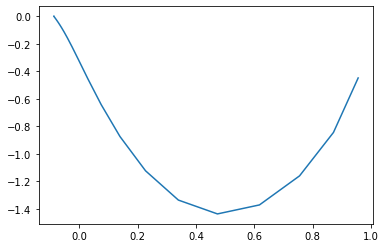

[72] loss: 0.007
[73] loss: 0.007
[74] loss: 0.007
[75] loss: 0.007
[76] loss: 0.007
[77] loss: 0.007
[78] loss: 0.007
[79] loss: 0.007
[80] loss: 0.007
[81] loss: 0.007


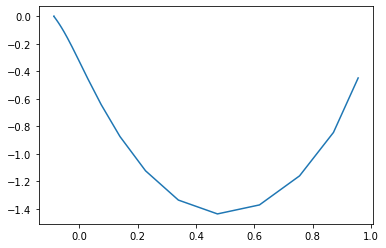

[82] loss: 0.007
[83] loss: 0.007
[84] loss: 0.007
[85] loss: 0.007
[86] loss: 0.007
[87] loss: 0.007
[88] loss: 0.007
[89] loss: 0.007
[90] loss: 0.007
[91] loss: 0.007


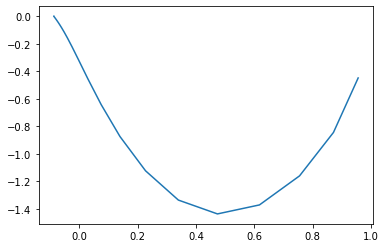

[92] loss: 0.007
[93] loss: 0.007
[94] loss: 0.007
[95] loss: 0.007
[96] loss: 0.007
[97] loss: 0.007
[98] loss: 0.007
[99] loss: 0.007
[100] loss: 0.007


In [11]:
T = 100  # number of time steps
dim_input = 2  # state space dimensions
dim_hidden = 6  # latent dimensions
dim_output = 1  # action space dimensions
d = Dynamics()  # define dynamics
c = Controller(dim_input, dim_hidden, dim_output)  # define controller
s = Simulation(c, d, T)  # define simulation
o = Optimize(s)  # define optimizer
o.train(100)  # solve the optimization problem